In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import operator
import itertools
import matplotlib as mpl
from sklearn import mixture
import warnings
warnings.filterwarnings("ignore")

In [16]:
df = pd.read_csv('US_Accidents_Dec20_updated.csv')
data = pd.read_csv('US_Accidents_Dec20_updated.csv')
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.00248,-117.37936,33.99888,-117.37094,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516060,A-4239403,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.76696,-117.14806,32.76555,-117.15363,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
1516061,A-4239404,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.77545,-117.84779,33.77740,-117.85727,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
1516062,A-4239405,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.99246,-118.40302,33.98311,-118.39565,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [4]:
df1 = df[['ID','Start_Time','Severity','Start_Lat','Start_Lng','Zipcode','City','State','Weather_Condition','Temperature(F)','Humidity(%)','Visibility(mi)','Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop','Sunrise_Sunset']]
df1['Zipcode'] = df1['Zipcode'].str.slice(stop=5).astype(float)
df1['City'] = df1['City'] .astype(str)
df1['State'] = df1['State'] .astype(str)
df1['Start_Time']= pd.to_datetime(df['Start_Time'])
a = {'Night' : 1,'Day' : 0}
df1['Sunrise_Sunset'] = df1['Sunrise_Sunset'].map(a)
df1

,ID,Start_Time,Severity,Start_Lat,Start_Lng,Zipcode,City,State,Weather_Condition,Temperature(F),...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,A-2716600,2016-02-08 00:37:08,3,40.10891,-83.09286,43017.0,Dublin,OH,Light Rain,42.1,...,False,False,False,False,False,False,False,False,False,1.0
1,A-2716601,2016-02-08 05:56:20,2,39.86542,-84.06280,45424.0,Dayton,OH,Light Rain,36.9,...,False,False,False,False,False,False,False,False,False,1.0
2,A-2716602,2016-02-08 06:15:39,2,39.10266,-84.52468,45203.0,Cincinnati,OH,Overcast,36.0,...,True,False,False,False,False,False,False,False,False,1.0
3,A-2716603,2016-02-08 06:15:39,2,39.10148,-84.52341,45202.0,Cincinnati,OH,Overcast,36.0,...,True,False,False,False,False,False,False,False,False,1.0
4,A-2716604,2016-02-08 06:51:45,2,41.06213,-81.53784,44311.0,Akron,OH,Overcast,39.0,...,False,False,False,False,False,False,False,False,False,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516059,A-4239402,2019-08-23 18:03:25,2,34.00248,-117.37936,92501.0,Riverside,CA,Fair,86.0,...,False,False,False,False,False,False,False,False,False,0.0
1516060,A-4239403,2019-08-23 19:11:30,2,32.76696,-117.14806,92108.0,San Diego,CA,Fair,70.0,...,False,False,False,False,False,False,False,False,False,0.0
1516061,A-4239404,2019-08-23 19:00:21,2,33.77545,-117.84779,92866.0,Orange,CA,Partly Cloudy,73.0,...,True,False,False,False,False,False,False,False,False,0.0
1516062,A-4239405,2019-08-23 19:00:21,2,33.99246,-118.40302,90230.0,Culver City,CA,Fair,71.0,...,False,False,False,False,False,False,False,False,False,0.0


Text(0, 0.5, 'Severity')

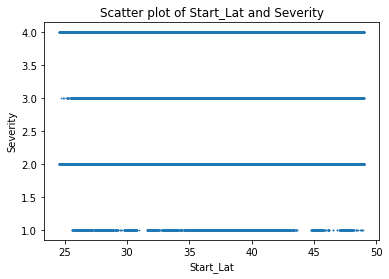

In [17]:
#Scatter Plot
plt.scatter(data['Start_Lat'], data['Severity'], s=0.5)
plt.title('Scatter plot of Start_Lat and Severity')
plt.xlabel('Start_Lat')
plt.ylabel('Severity')

Text(0, 0.5, 'Severity')

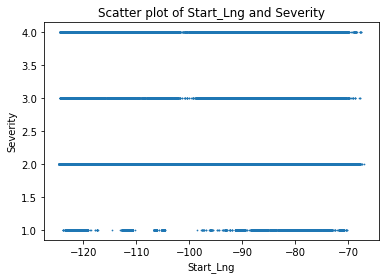

In [19]:
#Scatter Plot
plt.scatter(data['Start_Lng'], data['Severity'], s=0.5)
plt.title('Scatter plot of Start_Lng and Severity')
plt.xlabel('Start_Lng')
plt.ylabel('Severity')

In [21]:
#Pearson Correlation
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data[['Start_Lng', 'Severity']].corr(method='pearson')
print(correlations)

           Start_Lng  Severity
Start_Lng      1.000     0.179
Severity       0.179     1.000


In [22]:
#Pearson Correlation
pd.set_option('display.width', 100)
pd.set_option('precision', 3)
correlations = data[['Start_Lat', 'Severity']].corr(method='pearson')
print(correlations)

           Start_Lat  Severity
Start_Lat      1.000     0.079
Severity       0.079     1.000


Text(0, 0.5, 'Frequency')

<Figure size 7200x7200 with 0 Axes>

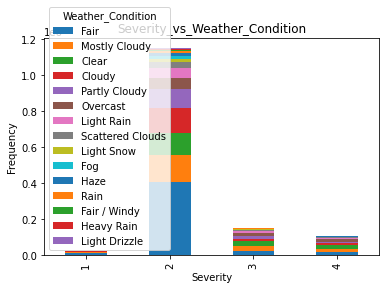

In [34]:
#
#plt.figure(figsize=(100, 100))
data_Severity_vs_Weather_Condition = data.groupby(['Severity', 'Weather_Condition'])['Severity'].count().unstack('Weather_Condition').fillna(0)
data_Severity_vs_Weather_Condition[['Fair','Mostly Cloudy', 'Clear', 'Cloudy','Partly Cloudy', 'Overcast', 'Light Rain','Scattered Clouds','Light Snow','Fog','Haze','Rain','Fair / Windy','Heavy Rain','Light Drizzle']].plot(kind='bar', stacked=True)
plt.title('Severity_vs_Weather_Condition')
plt.xlabel('Severity')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

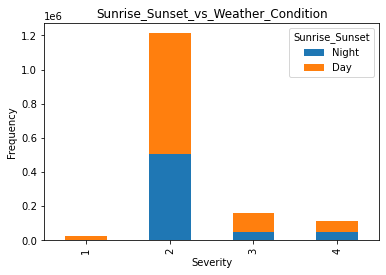

In [37]:
data_Severity_vs_Weather_Condition = data.groupby(['Severity', 'Sunrise_Sunset'])['Severity'].count().unstack('Sunrise_Sunset').fillna(0)
data_Severity_vs_Weather_Condition[['Night', 'Day']].plot(kind='bar', stacked=True)
plt.title('Sunrise_Sunset_vs_Weather_Condition')
plt.xlabel('Severity')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

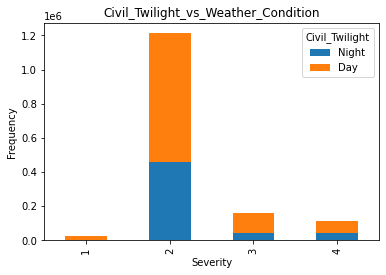

In [38]:
data_Severity_vs_Weather_Condition = data.groupby(['Severity', 'Civil_Twilight'])['Severity'].count().unstack('Civil_Twilight').fillna(0)
data_Severity_vs_Weather_Condition[['Night', 'Day']].plot(kind='bar', stacked=True)
plt.title('Civil_Twilight_vs_Weather_Condition')
plt.xlabel('Severity')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

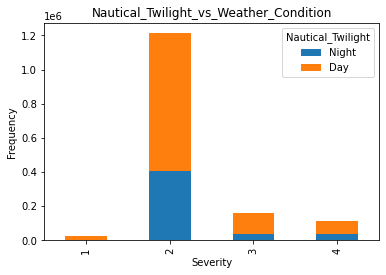

In [39]:
data_Severity_vs_Weather_Condition = data.groupby(['Severity', 'Nautical_Twilight'])['Severity'].count().unstack('Nautical_Twilight').fillna(0)
data_Severity_vs_Weather_Condition[['Night', 'Day']].plot(kind='bar', stacked=True)
plt.title('Nautical_Twilight_vs_Weather_Condition')
plt.xlabel('Severity')
plt.ylabel('Count')

Text(0, 0.5, 'Frequency')

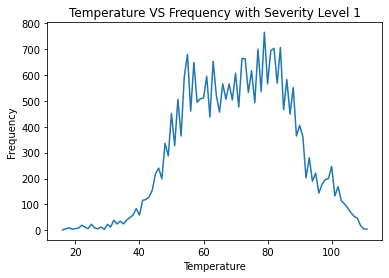

In [46]:
data_severity = data[data['Severity'] == 1]
data_temperature = data_severity['Temperature(F)'].value_counts().sort_index()
data_temperature.plot()
plt.title('Temperature VS Frequency with Severity Level 1')
plt.xlabel('Temperature')
plt.ylabel('Frequency')   
 
    

Text(0, 0.5, 'Frequency')

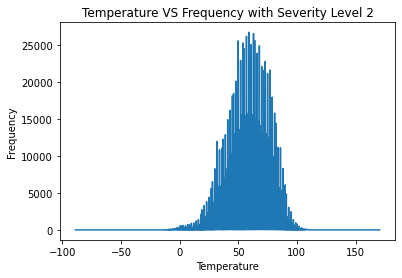

In [45]:
data_severity = data[data['Severity'] == 2]
data_temperature = data_severity['Temperature(F)'].value_counts().sort_index()
data_temperature.plot()
plt.title('Temperature VS Frequency with Severity Level 2')
plt.xlabel('Temperature')
plt.ylabel('Frequency')   

Text(0, 0.5, 'Frequency')

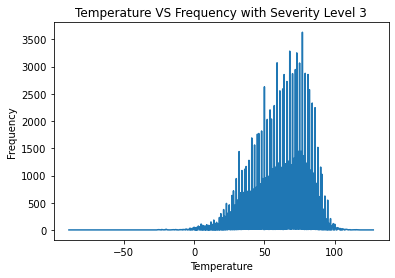

In [47]:
data_severity = data[data['Severity'] == 3]
data_temperature = data_severity['Temperature(F)'].value_counts().sort_index()
data_temperature.plot()
plt.title('Temperature VS Frequency with Severity Level 3')
plt.xlabel('Temperature')
plt.ylabel('Frequency')   

Text(0, 0.5, 'Frequency')

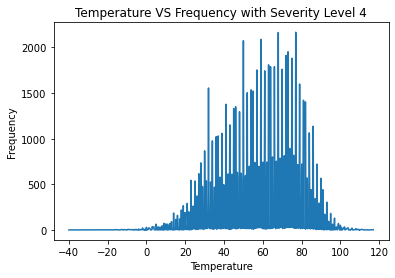

In [48]:
data_severity = data[data['Severity'] == 4]
data_temperature = data_severity['Temperature(F)'].value_counts().sort_index()
data_temperature.plot()
plt.title('Temperature VS Frequency with Severity Level 4')
plt.xlabel('Temperature')
plt.ylabel('Frequency')   

<AxesSubplot:title={'center':'Distribution of State'}, xlabel='State'>

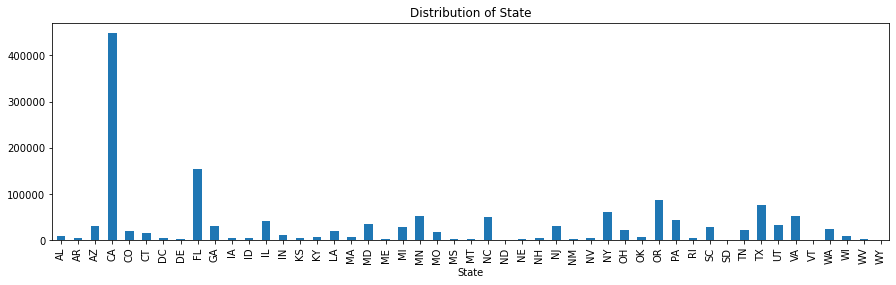

In [51]:
#事故发生各州分布图
data_state = data.sort_values(by='State')
groupby_State = data.groupby('State').size()
groupby_State.plot.bar(title='Distribution of State', figsize=(15, 4))

<AxesSubplot:title={'center':'Distribution of State by Serverity Level'}, xlabel='State'>

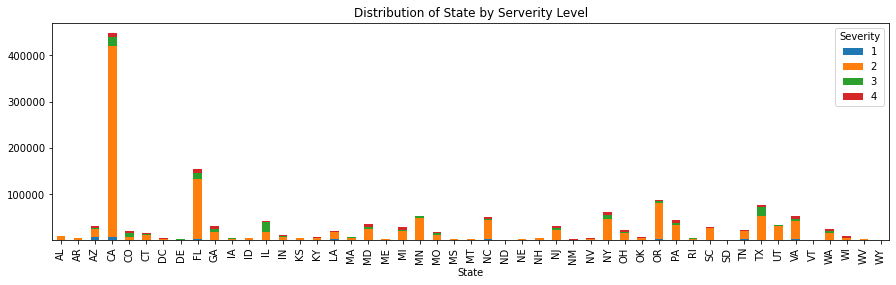

In [53]:
groupby_State_SeverityLevel = data.groupby(['State', 'Severity'])['State'].count().unstack('Severity').fillna(0)
groupby_State_SeverityLevel[[1, 2, 3, 4]].plot.bar(title='Distribution of State by Serverity Level', stacked=True, figsize=(15, 4))


